## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset - California Dataset


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3         X4           Y
0  41.716474  1022.196204  0.874896   1.699431  895.187935
1  67.295141  1391.753395  0.049735  10.106794   96.534051
2  76.096289  1549.795941  0.112492   2.881385  190.313967
3  40.638692   439.337654  0.506189   7.206063  226.049778
4  54.210132   821.733082  0.286249   6.667107  241.395935


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9984690	total: 57.4ms	remaining: 57.4s
1:	learn: 0.9876722	total: 58.1ms	remaining: 29s
2:	learn: 0.9773070	total: 59.4ms	remaining: 19.8s
3:	learn: 0.9666764	total: 60.3ms	remaining: 15s
4:	learn: 0.9518544	total: 60.8ms	remaining: 12.1s
5:	learn: 0.9401070	total: 61.4ms	remaining: 10.2s
6:	learn: 0.9301462	total: 62ms	remaining: 8.79s
7:	learn: 0.9174208	total: 62.6ms	remaining: 7.76s
8:	learn: 0.9076423	total: 63.1ms	remaining: 6.95s
9:	learn: 0.8953714	total: 63.7ms	remaining: 6.3s
10:	learn: 0.8858273	total: 64.4ms	remaining: 5.79s
11:	learn: 0.8742693	total: 64.9ms	remaining: 5.34s
12:	learn: 0.8605745	total: 65.6ms	remaining: 4.98s
13:	learn: 0.8475929	total: 66.1ms	remaining: 4.65s
14:	learn: 0.8347975	total: 66.5ms	remaining: 4.37s
15:	learn: 0.8231804	total: 67.1ms	remaining: 4.13s
16:	learn: 0.8120836	total: 67.8ms	remaining: 3.92s
17:	learn: 0.8024829	total: 68.2ms	remaining: 3.72s
18:	learn: 0.7944094	total: 68.9ms	remaining: 3.56s

126:	learn: 0.2387807	total: 116ms	remaining: 796ms
127:	learn: 0.2363922	total: 116ms	remaining: 792ms
128:	learn: 0.2341233	total: 117ms	remaining: 788ms
129:	learn: 0.2320383	total: 117ms	remaining: 783ms
130:	learn: 0.2298356	total: 118ms	remaining: 780ms
131:	learn: 0.2277773	total: 118ms	remaining: 777ms
132:	learn: 0.2254873	total: 119ms	remaining: 774ms
133:	learn: 0.2233552	total: 119ms	remaining: 770ms
134:	learn: 0.2214010	total: 120ms	remaining: 767ms
135:	learn: 0.2197353	total: 120ms	remaining: 763ms
136:	learn: 0.2176762	total: 121ms	remaining: 760ms
137:	learn: 0.2155172	total: 121ms	remaining: 757ms
138:	learn: 0.2136735	total: 122ms	remaining: 754ms
139:	learn: 0.2115985	total: 122ms	remaining: 750ms
140:	learn: 0.2094561	total: 123ms	remaining: 747ms
141:	learn: 0.2071382	total: 123ms	remaining: 743ms
142:	learn: 0.2058008	total: 124ms	remaining: 741ms
143:	learn: 0.2042742	total: 124ms	remaining: 737ms
144:	learn: 0.2025365	total: 125ms	remaining: 735ms
145:	learn: 

281:	learn: 0.0766610	total: 186ms	remaining: 474ms
282:	learn: 0.0763250	total: 187ms	remaining: 473ms
283:	learn: 0.0760666	total: 187ms	remaining: 472ms
284:	learn: 0.0758097	total: 188ms	remaining: 471ms
285:	learn: 0.0755601	total: 188ms	remaining: 470ms
286:	learn: 0.0753028	total: 189ms	remaining: 469ms
287:	learn: 0.0748946	total: 189ms	remaining: 468ms
288:	learn: 0.0746011	total: 190ms	remaining: 467ms
289:	learn: 0.0739789	total: 190ms	remaining: 466ms
290:	learn: 0.0735481	total: 191ms	remaining: 465ms
291:	learn: 0.0732701	total: 191ms	remaining: 464ms
292:	learn: 0.0729702	total: 192ms	remaining: 462ms
293:	learn: 0.0725616	total: 192ms	remaining: 461ms
294:	learn: 0.0722774	total: 192ms	remaining: 460ms
295:	learn: 0.0717567	total: 193ms	remaining: 458ms
296:	learn: 0.0713202	total: 193ms	remaining: 457ms
297:	learn: 0.0709227	total: 194ms	remaining: 456ms
298:	learn: 0.0704368	total: 194ms	remaining: 455ms
299:	learn: 0.0701581	total: 194ms	remaining: 453ms
300:	learn: 

538:	learn: 0.0247197	total: 297ms	remaining: 254ms
539:	learn: 0.0246655	total: 298ms	remaining: 254ms
540:	learn: 0.0245699	total: 298ms	remaining: 253ms
541:	learn: 0.0244401	total: 299ms	remaining: 252ms
542:	learn: 0.0243218	total: 299ms	remaining: 252ms
543:	learn: 0.0242689	total: 300ms	remaining: 251ms
544:	learn: 0.0241340	total: 300ms	remaining: 250ms
545:	learn: 0.0240096	total: 300ms	remaining: 250ms
546:	learn: 0.0238963	total: 301ms	remaining: 249ms
547:	learn: 0.0237666	total: 301ms	remaining: 248ms
548:	learn: 0.0236471	total: 302ms	remaining: 248ms
549:	learn: 0.0235385	total: 302ms	remaining: 247ms
550:	learn: 0.0234230	total: 302ms	remaining: 246ms
551:	learn: 0.0232995	total: 303ms	remaining: 246ms
552:	learn: 0.0231712	total: 303ms	remaining: 245ms
553:	learn: 0.0230678	total: 304ms	remaining: 244ms
554:	learn: 0.0229702	total: 304ms	remaining: 244ms
555:	learn: 0.0228904	total: 304ms	remaining: 243ms
556:	learn: 0.0228119	total: 305ms	remaining: 242ms
557:	learn: 

702:	learn: 0.0123142	total: 367ms	remaining: 155ms
703:	learn: 0.0122844	total: 368ms	remaining: 155ms
704:	learn: 0.0122238	total: 368ms	remaining: 154ms
705:	learn: 0.0121663	total: 368ms	remaining: 153ms
706:	learn: 0.0121483	total: 369ms	remaining: 153ms
707:	learn: 0.0121306	total: 369ms	remaining: 152ms
708:	learn: 0.0120733	total: 370ms	remaining: 152ms
709:	learn: 0.0119948	total: 371ms	remaining: 151ms
710:	learn: 0.0119385	total: 371ms	remaining: 151ms
711:	learn: 0.0119105	total: 371ms	remaining: 150ms
712:	learn: 0.0118704	total: 372ms	remaining: 150ms
713:	learn: 0.0118264	total: 372ms	remaining: 149ms
714:	learn: 0.0117717	total: 373ms	remaining: 148ms
715:	learn: 0.0117483	total: 373ms	remaining: 148ms
716:	learn: 0.0117095	total: 373ms	remaining: 147ms
717:	learn: 0.0116669	total: 374ms	remaining: 147ms
718:	learn: 0.0115929	total: 374ms	remaining: 146ms
719:	learn: 0.0115673	total: 375ms	remaining: 146ms
720:	learn: 0.0115397	total: 375ms	remaining: 145ms
721:	learn: 

954:	learn: 0.0054879	total: 479ms	remaining: 22.6ms
955:	learn: 0.0054681	total: 479ms	remaining: 22.1ms
956:	learn: 0.0054538	total: 480ms	remaining: 21.6ms
957:	learn: 0.0054397	total: 480ms	remaining: 21.1ms
958:	learn: 0.0054213	total: 481ms	remaining: 20.5ms
959:	learn: 0.0054026	total: 481ms	remaining: 20ms
960:	learn: 0.0053934	total: 481ms	remaining: 19.5ms
961:	learn: 0.0053851	total: 482ms	remaining: 19ms
962:	learn: 0.0053805	total: 482ms	remaining: 18.5ms
963:	learn: 0.0053716	total: 483ms	remaining: 18ms
964:	learn: 0.0053534	total: 483ms	remaining: 17.5ms
965:	learn: 0.0053453	total: 484ms	remaining: 17ms
966:	learn: 0.0053409	total: 484ms	remaining: 16.5ms
967:	learn: 0.0053365	total: 485ms	remaining: 16ms
968:	learn: 0.0053186	total: 485ms	remaining: 15.5ms
969:	learn: 0.0053081	total: 486ms	remaining: 15ms
970:	learn: 0.0052904	total: 486ms	remaining: 14.5ms
971:	learn: 0.0052880	total: 486ms	remaining: 14ms
972:	learn: 0.0052794	total: 487ms	remaining: 13.5ms
973:	le

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC - GAN Model with skip connection

In [11]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


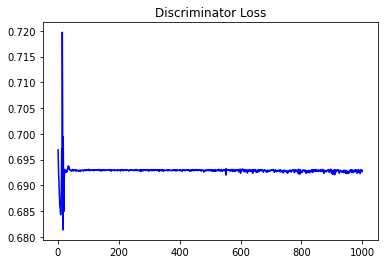

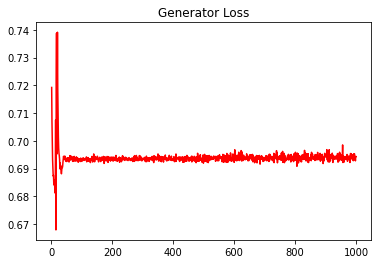

In [12]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.019540067725189847


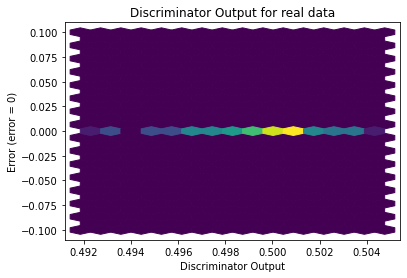

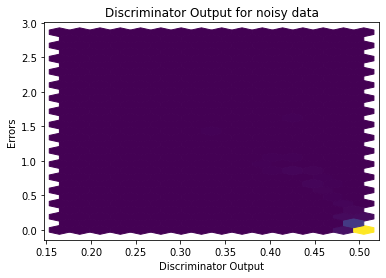

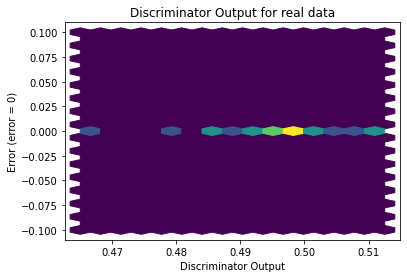

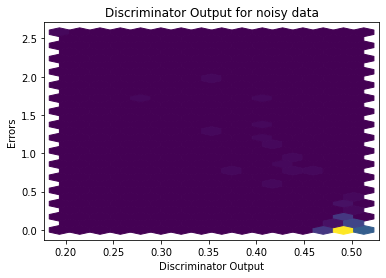

In [14]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [15]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.6329]], requires_grad=True)
